In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
dataset.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
nan_col = dataset.isna().sum().sort_values(ascending = False)
nan_col

n_data = len(dataset)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [9]:
dataset[dataset.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [10]:
dataset.shape

(381109, 12)

# Descriptive Statistical Analysis

In [11]:
# 1. What is the average age in this data?
avg_age = round(dataset['Age'].mean())
print(f'The average age is {avg_age}')

The average age is 39


In [13]:
# 2. What is the average premium that customers need to pay in a year?
avg_annual_premium = round(dataset['Annual_Premium'].mean())
print(f'The average premium that customers need to pay in a year Rs. {avg_annual_premium}')

The average premium that customers need to pay in a year Rs. 30564


In [35]:
# 3. What is the total number of male customers and female customers?
male = dataset['Gender']=='Male'
female = dataset['Gender']=='Female'

n_male = len(dataset[male])
n_female = len(dataset[female])

print(f'Number of male customers : {n_male}')
print(f'Number of female customers : {n_female}\n')

if (n_male > n_female):
    print(f'(( Number of male customers > female customers ))')
else:
    print(f'(( Number of male customers < female customers ))')

Number of male customers : 206089
Number of female customers : 175020

(( Number of male customers > female customers ))


In [36]:
# 4. What is the average age of male and female customers?
avg_age_male = round(dataset[male]['Age'].mean())
avg_age_female = round(dataset[female]['Age'].mean())

print(f'Average age of male customers : {avg_age_male}')
print(f'Average age of female customers : {avg_age_female}\n')

if (avg_age_male > avg_age_female):
    print(f'(( Average age of male customers > female customers ))')
else:
    print(f'(( Average age of male customers < female customers ))')

Average age of male customers : 41
Average age of female customers : 36

(( Average age of male customers > female customers ))


In [34]:
# 5. What is the average annual premium paid by customers who have vehicle insurance and those who do not have vehicle insurance?
vehicle_insurance = dataset.Previously_Insured == 1
non_vehicle_insurance = dataset.Previously_Insured == 0

avg_vehicle_insurance_premium = round(dataset[vehicle_insurance]['Annual_Premium'].mean(),2)
avg_non_vehicle_insurance_premium = round(dataset[non_vehicle_insurance]['Annual_Premium'].mean(),2)

print(f'Average premium customers who have vehicle insurance : Rs. {avg_vehicle_insurance_premium}')
print(f'Average premium who do not have vehicle insurance : Rs {avg_non_vehicle_insurance_premium}\n')

if (avg_vehicle_insurance_premium > avg_non_vehicle_insurance_premium):
    print(f'(( Average premium customers who have vehicle insurance > customers who do not have vehicle insurance ))')
else:
    print(f'(( Average premium customers who have vehicle insurance < customers who do not have vehicle insurance ))')

Average premium customers who have vehicle insurance : Rs. 30644.29
Average premium who do not have vehicle insurance : Rs 30496.82

(( Average premium customers who have vehicle insurance > customers who do not have vehicle insurance ))


In [38]:
# 6. What is the average annual premium paid by customers who have driving license and those who do not have driving license?
driving_license = dataset.Driving_License == 1
non_driving_license = dataset.Driving_License == 0

avg_driving_license_premium = round(dataset[driving_license]['Annual_Premium'].mean(),2)
avg_non_driving_license_premium = round(dataset[non_driving_license]['Annual_Premium'].mean(),2)

print(f'Average premium customers who have driving license : Rs. {avg_driving_license_premium}')
print(f'Average premium customers who do not have driving license : Rs. {avg_non_driving_license_premium}\n')

if (avg_driving_license_premium > avg_non_driving_license_premium):
    print(f'(( Average premium customers who have driving license > customers who do have driving license ))')
else:
    print(f'(( Average premium customers who have driving license < customers who do have driving license ))')

Average premium customers who have driving license : Rs. 30554.92
Average premium customers who do not have driving license : Rs. 34999.73

(( Average premium customers who have driving license < customers who do have driving license ))


In [40]:
# 7. What is the variance of the annual premiums paid by customers who have vehicle insurance and those who do not have vehicle insurance?
var_vehicle_insurance_premium = round(dataset[vehicle_insurance]['Annual_Premium'].var())
var_non_vehicle_insurance_premium = round(dataset[non_vehicle_insurance]['Annual_Premium'].var())

print(f'Variance premium customers who have vehicle insurance : {var_vehicle_insurance_premium}')
print(f'Variance premium customers who not have vehicle insurance : {var_non_vehicle_insurance_premium}\n')

if  var_vehicle_insurance_premium > var_non_vehicle_insurance_premium: 
    print(f'(( Variance premium customers who have vehicle insurance > customers who not have vehicle insurance ))')
else :
    print(f'(( Variance premium customers who have vehicle insurance < customers who not have vehicle insurance ))')


Variance premium customers who have vehicle insurance : 250286700
Variance premium customers who not have vehicle insurance : 335192986

(( Variance premium customers who have vehicle insurance < customers who not have vehicle insurance ))


# Discrete Variable Analysis

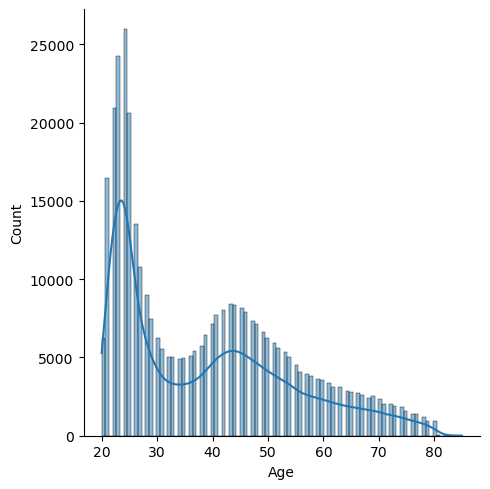

In [44]:
# 1. How is probability mass function distribution of the customer age?
sns.displot(data=dataset, x='Age', kde=True)
plt.show()


In [47]:
# 2. What is the proportion of the number of male vs female customers? Which gender has the higher proportion?
customer_per_gender = dataset.groupby(['Gender']).agg({'id':'count'}).sort_values(by='Gender', ascending=False)
customer_per_gender['Proportion'] = customer_per_gender/customer_per_gender.sum()
customer_per_gender = customer_per_gender.rename(columns = {'id' : 'Count'}).reset_index()

print(f'Proportion per Gender \n {customer_per_gender}')

Proportion per Gender 
    Gender   Count  Proportion
0    Male  206089    0.540761
1  Female  175020    0.459239


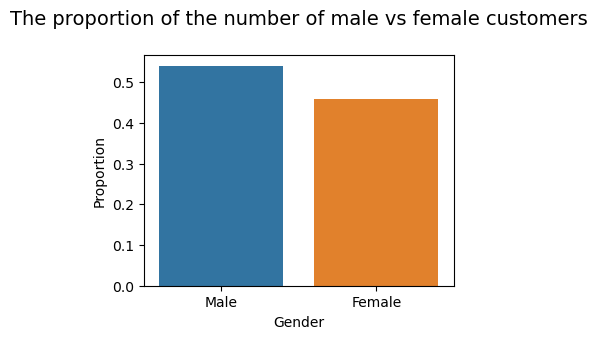

In [66]:
plt.figure(figsize=(4,3))
ax = sns.barplot(y='Proportion',
                 x='Gender',
                 data=customer_per_gender)
    
# Title and label    
ax.set_title("The proportion of the number of male vs female customers\n", fontsize=14)
ax.set_ylabel('Proportion')
ax.set_xlabel('Gender', fontsize=10)
plt.show()

In [51]:
# 3. What is the proportion of the average annual premium of male vs female customers? 
customer_gender_premi = dataset.groupby(['Gender']).agg({'Annual_Premium':'mean'}).sort_values(by='Gender', ascending=False)
customer_gender_premi['Proportion'] = customer_gender_premi/customer_gender_premi.sum()
customer_gender_premi = customer_gender_premi.reset_index()

print(f'Proportion Annual Premium per Gender \n {customer_gender_premi}')

Proportion Annual Premium per Gender 
    Gender  Annual_Premium  Proportion
0    Male    30622.649122    0.501038
1  Female    30495.787990    0.498962


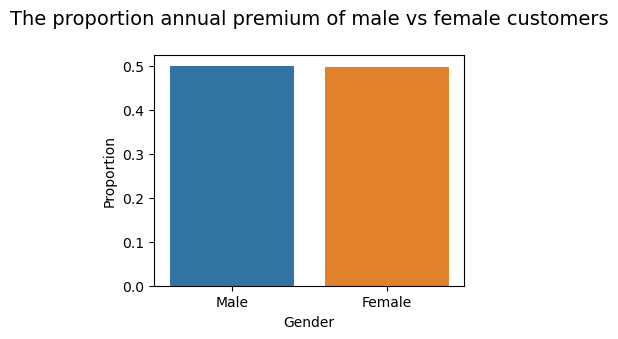

In [67]:
plt.figure(figsize=(4,3))
ax = sns.barplot(y='Proportion',
                 x='Gender',
                 data=customer_gender_premi)

# Title and label    
ax.set_title("The proportion annual premium of male vs female customers\n", fontsize=14)
ax.set_ylabel('Proportion')
ax.set_xlabel('Gender', fontsize=10)
plt.show()

In [60]:
# 4. What is the proportion of the number of customer who have vehicle insurance vs customer who do not have vehicle insurance?
customer_having_insured = dataset.groupby(['Previously_Insured']).agg({'id':'count'}).sort_values(by='Previously_Insured', ascending=True)
customer_having_insured['Proportion'] = customer_having_insured/customer_having_insured.sum()
customer_having_insured = customer_having_insured.rename(columns = {'id' : 'Count'}).reset_index()

print(f'Proportion Customer based Vehicle Insurance \n {customer_having_insured}')


Proportion Customer based Vehicle Insurance 
    Previously_Insured   Count  Proportion
0                   0  206481     0.54179
1                   1  174628     0.45821


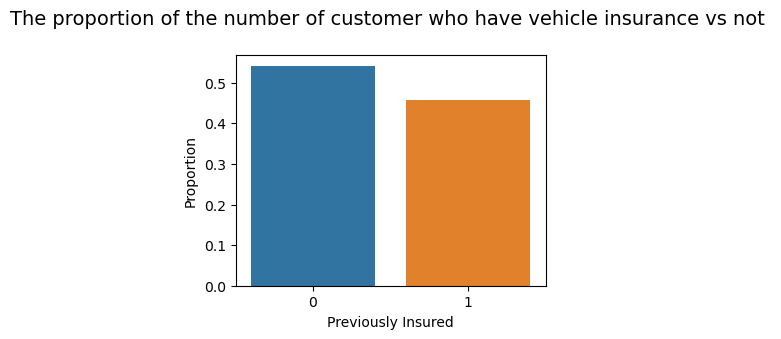

In [73]:
plt.figure(figsize=(4,3))
ax = sns.barplot(y='Proportion',
                 x='Previously_Insured',
                 data=customer_having_insured)

# Title and label    
ax.set_title("The proportion of the number of customer who have vehicle insurance vs not \n", fontsize=14)
ax.set_ylabel('Proportion')
ax.set_xlabel('Previously Insured', fontsize=10)
plt.show()

In [64]:
# 5. What is the proportion of the number of customer's vehicle age?
customer_vehicle_age = dataset.groupby(['Vehicle_Age']).agg({'id':'count'}).sort_values(by='Vehicle_Age')
customer_vehicle_age['Proportion'] = customer_vehicle_age/customer_vehicle_age.sum()
customer_vehicle_age = customer_vehicle_age.rename(columns = {'id' : 'Count'}).reset_index()

print(f'Proportion Customer based Vehicle Age \n {customer_vehicle_age}\n')


Proportion Customer based Vehicle Age 
   Vehicle_Age   Count  Proportion
0    1-2 Year  200316    0.525613
1    < 1 Year  164786    0.432385
2   > 2 Years   16007    0.042001



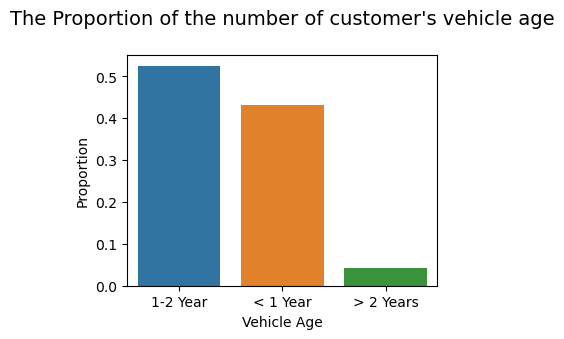

In [69]:
plt.figure(figsize=(4,3))
ax = sns.barplot(y='Proportion',
                 x='Vehicle_Age',
                 data=customer_vehicle_age)
#for i in ax.containers:
#    ax.bar_label(i,)

# Title and label    
ax.set_title("The Proportion of the number of customer's vehicle age\n", fontsize=14)
ax.set_ylabel('Proportion')
ax.set_xlabel('Vehicle Age', fontsize=10)
plt.show()

In [71]:
# 6. What is the proportion of the number of customer's response?
customer_response = dataset.groupby(['Response']).agg({'id':'count'}).sort_values(by='Response', ascending=True)
customer_response['Proportion'] = customer_response/customer_response.sum()
customer_response = customer_response.rename(columns = {'id' : 'Count'}).reset_index()

print(f'Proportion Customer based Response \n {customer_response}')


Proportion Customer based Response 
    Response   Count  Proportion
0         0  334399    0.877437
1         1   46710    0.122563


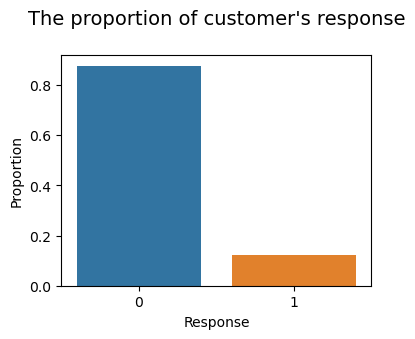

In [74]:
plt.figure(figsize=(4,3))
ax = sns.barplot(y='Proportion',
                 x='Response',
                 data=customer_response)

# Title and label    
ax.set_title("The proportion of customer's response\n", fontsize=14)
ax.set_ylabel('Proportion')
ax.set_xlabel('Response', fontsize=10)
plt.show()

In [82]:
vehicle_age_response = dataset.groupby(['Vehicle_Age','Response']).agg({'id':'count'}).sort_values(by='Vehicle_Age', ascending=True)
vehicle_age_response = vehicle_age_response.rename(columns = {'id' : 'Count'})
vehicle_age_response

Count
Vehicle_Age Response        
1-2 Year    0         165510
            1          34806
< 1 Year    0         157584
            1           7202
> 2 Years   0          11305
            1           4702

In [87]:
having_insured_response = dataset.groupby(['Previously_Insured','Response']).agg({'id':'count'}).sort_values(by='Previously_Insured', ascending=False)
having_insured_response = having_insured_response.rename(columns = {'id' : 'Count'})
having_insured_response

Count
Previously_Insured Response        
1                  0         174470
                   1            158
0                  0         159929
                   1          46552

In [83]:
# 7. What is the probability of customers being interested in having insurance when the age of their vehicle is less than 1 year?
prob_interest_below_1_year = len(dataset[(dataset['Response']==1)&(dataset['Vehicle_Age']=='< 1 Year')])/len(dataset)
print(f'The probability of customers being interested in having insurance when the age of their vehicle is less than 1 year : {prob_interest_below_1_year}')

The probability of customers being interested in having insurance when the age of their vehicle is less than 1 year : 0.01889748077321711


In [89]:
# 8. What is the probability of customers being interested in having insurance when the customer ever had previously insurance?
prob_interest_have_insurance = len(dataset[(dataset['Response']==1)&(dataset['Previously_Insured']==1)])/len(dataset)
print(f'The probability of customers being interested in having insurance when the customer ever had previously insurace : {prob_interest_have_insurance}')

The probability of customers being interested in having insurance when the customer ever had previously insurace : 0.0004145795559800477


# Continuous Variable Analysis 

In [95]:
# 1. Which one is more likely to occur:
     #Customer above the age of 30 pays annual premium above 30500
     #Customer below the age of 30 pays annual premium above 30500

age_above_30 = len(dataset[dataset['Age']>=30])
age_above_30_premium_above_30500 = len(dataset[dataset['Age']>=30][dataset['Annual_Premium']>=30500])
probability_age_above_30_premium_above_30500 = round((age_above_30_premium_above_30500 / age_above_30),4)
print(f'Probability customer with age > 30 who have annual premium > 30500 is {probability_age_above_30_premium_above_30500}')

age_below_30 = len(dataset[dataset['Age']<30])
age_below_30_premium_above_30500 = len(dataset[dataset['Age']<30][dataset['Annual_Premium']>=30500])
probability_age_below_30_premium_above_30500 = round((age_below_30_premium_above_30500 / age_below_30),4)
print(f'Probability customer with age < 30 who have annual premium > 30500 is {probability_age_below_30_premium_above_30500}')

if (probability_age_above_30_premium_above_30500 > probability_age_below_30_premium_above_30500):
    print(f'\nIt is more likely to occur customer with age > 30 who have annual premium > 30500 \nbecause the probability is higher, it is {probability_age_above_30_premium_above_30500}')
else:
    print(f'\nIt is more likely to occur customer with age < 30 who have annual premium > 30500 \nbecause the probability is higher, it is {probability_age_below_30_premium_above_30500}')
 

Probability customer with age > 30 who have annual premium > 30500 is 0.5738
Probability customer with age < 30 who have annual premium > 30500 is 0.5029

It is more likely to occur customer with age > 30 who have annual premium > 30500 
because the probability is higher, it is 0.5738


In [103]:
# 2. Which one is more likely to occur:
     #Customer above the age of 30 who have previous insurance
     #Customer below the age of 30 who have previous insurance

have_insurance_age_above_30 = len(dataset[dataset['Previously_Insured']==1][dataset['Age']>=30])
probability_have_insurance_age_above_30 = round((have_insurance_age_above_30 / age_above_30),4)
print(f'Probability have insurance with age above 30 is {probability_have_insurance_age_above_30}')   

have_insurance_age_below_30 = len(dataset[dataset['Previously_Insured']==1][dataset['Age']<30])
probability_have_insurance_age_below_30 = round((have_insurance_age_below_30 / age_below_30),4)
print(f'Probability have insurance with age above 30 is {probability_have_insurance_age_below_30}') 

if (have_insurance_age_above_30 > have_insurance_age_belowe_30):
    print(f'\nIt is more likely to occur customer with age > 30 who have previous insurance \nbecause the probability is higher, it is {probability_have_insurance_age_above_30}')
else:
    print(f'\nIt is more likely to occur customer with age < 30 who have previous insurance \nbecause the probability is higher, it is {probability_have_insurance_age_below_30}')
 

Probability have insurance with age above 30 is 0.3211
Probability have insurance with age above 30 is 0.6577

It is more likely to occur customer with age < 30 who have previous insurance 
because the probability is higher, it is 0.6577


In [105]:
# 3. Which one is more likely to occur:
     #Customer above the age of 30 who do not have previous insurance and pays annual premium above 30500
     #Customer below the age of 30 who have previous insurance and pays annual premium above 30500

non_insurance_age_above_30 = len(dataset[dataset['Previously_Insured']==0][dataset['Age']>=30])
non_insurance_age_above_30_premium_above_30500 = len(dataset[dataset['Previously_Insured']==0]
                                                     [dataset['Age']>=30][dataset['Annual_Premium']>=30500])
probability_non_insurance_age_above_30_premium_above_30500 = round((non_insurance_age_above_30_premium_above_30500 / non_insurance_age_above_30),4)
print(f'Probability age above 30 who do not have previous insurance and pay annual premium above 30500 is {probability_non_insurance_age_above_30_premium_above_30500}')
        
insurance_age_below_30 = len(dataset[dataset['Previously_Insured']==1][dataset['Age']<30])
insurance_age_below_30_premium_above_30500 = len(dataset[dataset['Previously_Insured']==1]
                                                [dataset['Age']<30][dataset['Annual_Premium']>=30500])
probability_insurance_age_below_30_premium_above_30500 = round((insurance_age_below_30_premium_above_30500 / insurance_age_below_30),4)
print(f'Probability age below 30 who have previous insurance and pay annual premium above 30500 is {probability_insurance_age_below_30_premium_above_30500}')

if (probability_non_insurance_age_above_30_premium_above_30500 > probability_insurance_age_below_30_premium_above_30500):
    print(f'\nIt is more likely to occur customer with age > 30 who do not have previous insurance and pay annual premium > 30500 \nbecause the probability is higher, it is {probability_non_insurance_age_above_30_premium_above_30500}')
else:
    print(f'\nIt is more likely to occur customer with age < 30 who have previous insurance and pay annual premium > 30500 \nbecause the probability is higher, it is {probability_age_below_30_premium_above_30500}')


Probability age above 30 who do not have previous insurance and pay annual premium above 30500 is 0.5865
Probability age below 30 who have previous insurance and pay annual premium above 30500 is 0.5066

It is more likely to occur customer with age > 30 who do not have previous insurance and pay annual premium > 30500 
because the probability is higher, it is 0.5865


# Variable Correlation Analysis 

The corelation age and annual premium at customer have insurance is 0.06750700155668837


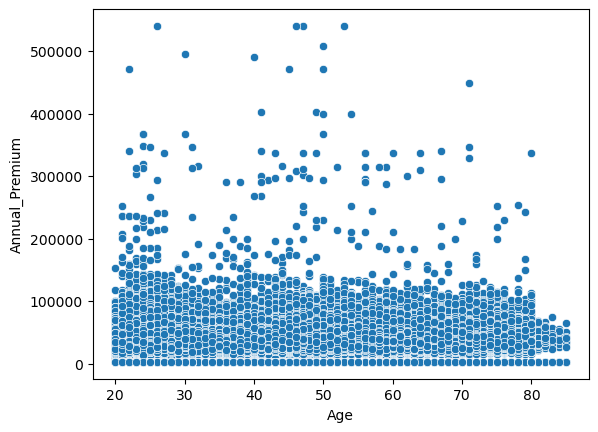

In [120]:
# 1. How is the correlation between the variables Age and Annual Premium?
corr_age_premium = dataset['Age'].corr(dataset['Annual_Premium'])
sns.scatterplot(data=dataset,x=dataset['Age'],y=dataset['Annual_Premium'])
print(f'The corelation age and annual premium at customer have insurance is {corr_age_premium}')
plt.show()

Based on the plot, it can be observed that the correlation between age with annual premium is positive, but the correlation is weak with a value of 0.06751. This indicates that the variables age have a positive influence, but it is not really significant on annual premium.

The corelation age and customer have insurance at annual premium is 0.02687233319314686


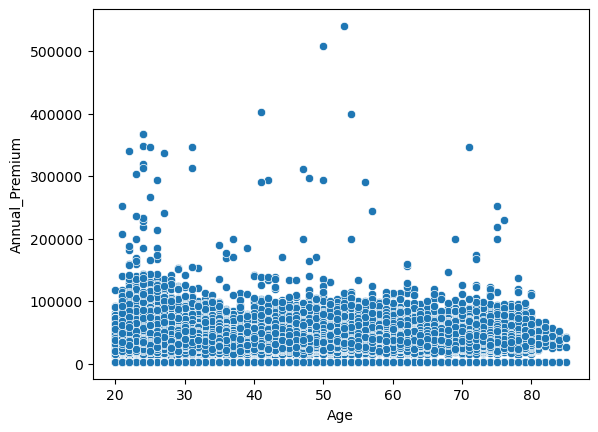

In [107]:
# 2. How is the correlation between the variables Previously_Insured = 1, Age and Annual Premium?
corr_age_premium_have_insurance = dataset[dataset['Previously_Insured']==1]['Age'].corr(dataset['Annual_Premium'])
sns.scatterplot(data=dataset,x=dataset[dataset['Previously_Insured']==1]['Age'],y=dataset['Annual_Premium'])
print(f'The corelation age and customer have insurance at annual premium is {corr_age_premium_have_insurance}')
plt.show()

Based on the plot, it can be observed that the correlation between age where the previously insured is yes with annual premium is positive, but the correlation is weak with a value of 0.02687. This indicates that the variables age and previously insured have a positive influence, but it is not really significant on annual premium.

The corelation age where the customer have interest in insurance at annual premium is 0.12395984204766056


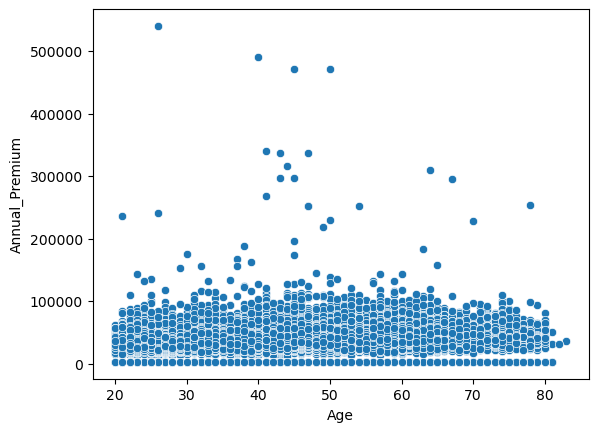

In [114]:
# 3. How is the correlation between the variables Response = 1, Age and Annual Premium?
corr_age_response_premium = dataset[dataset['Response']==1]['Age'].corr(dataset['Annual_Premium'])
sns.scatterplot(data=dataset,x=dataset[dataset['Response']==1]['Age'],y=dataset['Annual_Premium'])
print(f'The corelation age where the customer have interest in insurance at annual premium is {corr_age_response_premium}')
plt.show()

Based on the plot, it can be observed that the correlation between age where the customer have interest in insurance with annual premium is positive, but the correlation is weak with a value of 0.12396. This indicates that the variables age and response  have a positive influence, but it is not really significant on annual premium.

The corelation age and annual premium at customer have insurance is -0.08218165200944164


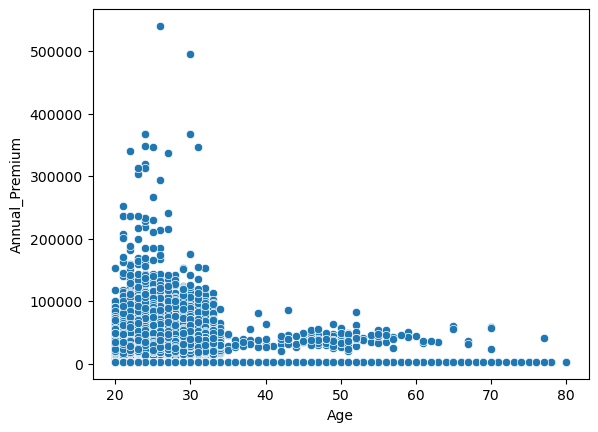

In [117]:
# 4. How is the correlation between the variables Vehicle Age below 1, Age and Annual Premium?
corr_below_1_age_premium = dataset[dataset['Vehicle_Age']=='< 1 Year']['Age'].corr(dataset['Annual_Premium'])
sns.scatterplot(data=dataset,x=dataset[dataset['Vehicle_Age']=='< 1 Year']['Age'],y=dataset['Annual_Premium'])
print(f'The corelation age and annual premium at customer have insurance is {corr_below_1_age_premium}')
plt.show()

Based on the plot, it can be observed that the correlation between age where the vehicle age below 1 year with annual premium is negative, but the correlation is weak with a value of -0.08218. This indicates that the variables age and vehicle age below 1 year have a negative influence, but it is not really significant on annual premium.

# Hypothesis Testing

In [ ]:
# 1. The annual premium for those previously insured is less than or equal to the annual premium for those not previously insured.
# 2. The annual premium have driven license is less than annual premium not have driven license.
# 3. The proportion of license-driven owners with response 1 is greater than or equal to the proportion of non-license-driven owners with response 1.
# 4. The proportion of previous insurance owners with response 1 is greater than or equal to the proportion of insurance owners with response 0.
# 5. The variance of annual premium for males and females is the same.

In [121]:
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [122]:
# Create and select specific columns for the data to be hypothesized
H_data = dataset.loc[:,['Age','Gender','Annual_Premium','Driving_License','Previously_Insured','Response']]
H_data['Annual_Premium_in_thousand'] = dataset['Annual_Premium']/1000
H_data.head()

,Age,Gender,Annual_Premium,Driving_License,Previously_Insured,Response,Annual_Premium_in_thousand
0,44,Male,40454.0,1,0,1,40.454
1,76,Male,33536.0,1,0,0,33.536
2,47,Male,38294.0,1,0,1,38.294
3,21,Male,28619.0,1,1,0,28.619
4,29,Female,27496.0,1,1,0,27.496


In [123]:
# Import Python libraries that will be used for hypothesis testing
import scipy.stats as stats
import math
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

1. Annual premium have previously insured <= annual premium not have previously insured
H0 = Annual premium have previously insured <= annual premium not have previously insured
H1 = Annual premium have previously insured > annual premium not have previously insured

In [167]:
have_insurance = H_data.Previously_Insured ==1
not_have_insurance = H_data.Previously_Insured ==0

sample_1 = (H_data[have_insurance]['Annual_Premium_in_thousand'])
sample_2 = (H_data[not_have_insurance]['Annual_Premium_in_thousand'])

In [168]:
stat1, pvalue1 = ttest_ind(sample_1, sample_2, equal_var=False, alternative='greater')
print(f'Stat value = {stat1}\nP-Value = {pvalue1}\n')

if (pvalue1 < 0.05):
    print(f'If the p-value {pvalue1} is less than 0.05, then H0 is rejected and H1 is accepted')
else:
    print(f'If the p-value {pvalue1} is greater than 0.05, then H0 fails to be rejected')

Stat value = 2.66743187388792
P-Value = 0.00382183073651225

If the p-value 0.00382183073651225 is less than 0.05, then H0 is rejected and H1 is accepted


From the above result, it is known that the p-value is 0.00382, therefore H0 is rejected. This means that there is enough evidence to conclude that there is a significant difference between the tested groups, indicating that the Annual Premium for those who have previously insured is greater than the annual premium for those who have not previously insured.

2. Annual premium have driven license <= annual premium not have driven license
H0 = Annual premium have driven license <= annual premium not have driven license
H1 = Annual premium have driven license > annual premium not have driven license

In [179]:
driving_license_1 = H_data.Driving_License == 1
driving_license_0 = H_data.Driving_License == 0

sample_1 = (H_data[driving_license_1]['Annual_Premium'])
sample_2 = (H_data[driving_license_0]['Annual_Premium'])

In [180]:
stat2, pvalue2 = ttest_ind(sample_1, sample_2, equal_var=False, alternative='greater')
print(f'Stat value = {stat2}\nP-Value = {pvalue2}\n')

if (pvalue2 < 0.05):
    print(f'If the p-value {pvalue2} is less than 0.05, then H0 is rejected and H1 is accepted')
else:
    print(f'If the p-value {pvalue2} is greater than 0.05, then H0 fails to be rejected')

Stat value = -6.836091756273567
P-Value = 0.9999999999920179

If the p-value 0.9999999999920179 is greater than 0.05, then H0 fails to be rejected


From the above result, it is known that the p-value is 0.9999999999920179, we fail to reject H0. This means that there is not enough evidence to conclude the presence of a significant difference between the tested groups. In this context, we cannot draw the conclusion that the alternative hypothesis H1 is true or that a significant difference exists between the tested groups, indicating that the Annual Premium for those who have have driven license is less than or equal to the annual premium for those who have not driven license. 

3. Proportion of license-driven owners with response 1 >=  proportion of non-license-driven owners with response 1
H0 = Proportion of license-driven owners with response 1 >=  proportion of non-license-driven owners with response 1
H1 = Proportion of license-driven owners with response 1 <  proportion of non-license-driven owners with response 1

In [181]:
response_1 = (H_data.Response == 1)

have_license = H_data.Driving_License == 1
not_have_license = H_data.Driving_License == 0

n_sample_1 = len(H_data[have_license][response_1])
n_sample_2 = len(H_data[not_have_license][response_1])

n_total_1 = len(H_data[have_license])
n_total_2 = len(H_data[not_have_license])

In [182]:
number_of_success = np.array([n_sample_1, n_sample_2])
total_sample_sizes = np.array([n_total_1, n_total_2])

stat3, pvalue3 = proportions_ztest(number_of_success, total_sample_sizes, alternative='smaller')
print(f'Stat value = {stat3}\nP-Value = {pvalue3}\n')

if (pvalue3 < 0.05):
    print(f'If the p-value {pvalue3} is less than 0.05, then H0 is rejected and H1 is accepted')
else:
    print(f'If the p-value {pvalue3} is greater than 0.05, then H0 fails to be rejected')

Stat value = 6.269198152076968
P-Value = 0.9999999998185439

If the p-value 0.9999999998185439 is greater than 0.05, then H0 fails to be rejected


From the above result, it is known that the p-value is 0.0.9999999998185439, we fail to reject H0. This means that there is not enough evidence to conclude the presence of a significant difference between the tested groups. In this context, we cannot draw the conclusion that the alternative hypothesis H1 is true or that a significant difference exists between the tested groups, indicating that the proportion of license-driven owners with interested in having insurance is greater than or equal to proportion of non-license-driven owners with interested in having insurance. 

4. Proportion of previous insurance owners with response 1 >= proportion of insurance owners with response 0
H0 = Proportion of previous insurance owners with response 1 >= proportion of insurance owners with response 0
H1 = Proportion of previous insurance owners with response 1 < proportion of insurance owners with response 0

In [183]:
response_1 = (H_data.Response == 1)
response_0 = (H_data.Response == 0)

male = (H_data.Gender == 'Male')
female = (H_data.Gender == 'Female')

have_insurance = H_data.Previously_Insured == 1
not_have_insurance = H_data.Previously_Insured == 0

n_sample_1 = len(H_data[have_insurance][response_1])
n_sample_2 = len(H_data[not_have_insurance][response_1])

n_total_1 = len(H_data[have_insurance])
n_total_2 = len(H_data[not_have_insurance])


In [184]:
number_of_success = np.array([n_sample_1, n_sample_2])
total_sample_sizes = np.array([n_total_1, n_total_2])

stat4, pvalue4 = proportions_ztest(number_of_success, total_sample_sizes, alternative='smaller')
print(f'Stat value = {stat4}\nP-Value = {pvalue4}\n')

if (pvalue4 < 0.05):
    print(f'If the p-value {pvalue4} is less than 0.05, then H0 is rejected and H1 is accepted')
else:
    print(f'If the p-value {pvalue4} is greater than 0.05, then H0 fails to be rejected')

Stat value = -210.61826302899098
P-Value = 0.0

If the p-value 0.0 is less than 0.05, then H0 is rejected and H1 is accepted


From the above result, it is known that the p-value is 0.0. Therefore, we reject H0 and accept the alternative hypothesis H1, suggesting that there is a significant difference or relationship between the variables being tested. Proportion of previous insurance owners with response 1 is less than proportion of insurance owners with response 0

5. Variance of annual premium for males and females is the same
H0 = variance annual premium for males = variance annual premium females
H1 = variance annual premium for males ≠ variance annual premium females

In [156]:
male = H_data.Gender == 'Male'
female = H_data.Gender == 'Female'

sample_1 = (H_data[male]['Annual_Premium_in_thousand'])
sample_2 = (H_data[female]['Annual_Premium_in_thousand'])

s_1 = np.var(sample_1)
s_2 = np.var(sample_2)

len_sample_1 = len(sample_1)
len_sample_2 = len(sample_2)


In [157]:
stat5, pvalue5 = stats.levene(sample_1,sample_2)
print(f'Stat value = {stat5}\nP-Value = {pvalue5}\n')

if (pvalue5 < 0.05):
    print(f'If the p-value {pvalue5} is less than 0.05, then H0 is rejected and H1 is accepted')
else:
    print(f'If the p-value {pvalue5} is greater than 0.05, then H0 fails to be rejected')

Stat value = 290.05457638998547
P-Value = 5.114293745910101e-65

If the p-value 5.114293745910101e-65 is less than 0.05, then H0 is rejected and H1 is accepted


From the above result, it is known that the p-value is 5.114293745910101e-65, we can conclude that the result is statistically significant. The extremely small pvalue indicates that the observed data is highly unlikely to occur under the assumption of equal variances between the groups being compared. Therefore, we reject H0 and accept the alternative hypothesis H1, indicating that there is a significant difference in the variances between annual premium for males and annual premium females.